<a href="https://colab.research.google.com/github/avetodef/applied-ai-itmo/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%A4%D0%B5%D0%B4%D0%BE%D1%82%D1%8C%D0%B5%D0%B2%D0%B0_%D0%A1%D0%BE%D1%84%D1%8C%D1%8F_R32423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Федотьева Софья R32423

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [132]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_lab2.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test _lab2.csv')

In [133]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [134]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


функция для проверки и подсчета пропущенных значений в тестовом наборе данных 

In [135]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():
            
            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')
            
            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 16, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Uti

проверка, какие признаки можно удалить. признак удаляется если пропущенных значений слишком много, иначе пропущенные значения заполняется средним или медианным значением для чисел и новым типом значением missing для строк

In [136]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

проверка данных

In [137]:
missing_value_checker(test_edited)

[]
0


In [138]:
missing_value_checker(train_edited)

[]
0


In [139]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [140]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [141]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

делим данные из train на тренировочные и проверочные в соотношении 80/20

In [142]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [143]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

для создания модели я использовала фреймворк tensorflow

в нейронной сети три слоя, в первом 100 входов, во втором 50

в качестве функции активации была выбрана relu

In [144]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = keras.Sequential([
        layers.Dense(100,input_dim = (75), activation="relu", name="layer1"),
        layers.Dense(50, activation="relu", name="layer2"),
        layers.Dense(1, name="layer3"),
    ])
tf.random.set_seed(40)

я взяла mse - mean squared error в качестве функции потерь, оптимизатор adam - адаптивная оценка момента и mae - mean average error в качестве метрики чтобы можно было наглядно увидеть качество предсказаний нейросети

In [145]:
model.compile(loss="mse", optimizer='adam', metrics=['mae'])

In [146]:
history = model.fit(X_train, y_train, verbose = 1, epochs = 40, batch_size = 100)

Epoch 1/40
12/12 [==============================] - 0s 2ms/step - loss: 38055944192.0000 - mae: 178124.8281
Epoch 2/40
12/12 [==============================] - 0s 2ms/step - loss: 36434341888.0000 - mae: 173848.4844
Epoch 3/40
12/12 [==============================] - 0s 4ms/step - loss: 34178109440.0000 - mae: 167717.5938
Epoch 4/40
12/12 [==============================] - 0s 4ms/step - loss: 31073806336.0000 - mae: 158649.7188
Epoch 5/40
12/12 [==============================] - 0s 3ms/step - loss: 26803523584.0000 - mae: 145257.7031
Epoch 6/40
12/12 [==============================] - 0s 3ms/step - loss: 21356834816.0000 - mae: 126638.0703
Epoch 7/40
12/12 [==============================] - 0s 3ms/step - loss: 15652054016.0000 - mae: 102763.2422
Epoch 8/40
12/12 [==============================] - 0s 3ms/step - loss: 10715613184.0000 - mae: 76723.5156
Epoch 9/40
12/12 [==============================] - 0s 3ms/step - loss: 7883032576.0000 - mae: 57007.0977
Epoch 10/40
12/12 [============

{'loss': [38055944192.0, 36434341888.0, 34178109440.0, 31073806336.0, 26803523584.0, 21356834816.0, 15652054016.0, 10715613184.0, 7883032576.0, 7032289792.0, 6637545472.0, 6292589056.0, 6008871424.0, 5771257344.0, 5498038784.0, 5252938240.0, 4987643904.0, 4811306496.0, 4660929536.0, 4459675136.0, 4337314816.0, 4174077696.0, 4061303552.0, 3954280192.0, 3872352000.0, 3752582400.0, 3662452480.0, 3587976704.0, 3518580736.0, 3436548352.0, 3364137472.0, 3300558848.0, 3230527488.0, 3173044736.0, 3110914560.0, 3058691584.0, 2997848832.0, 2957673216.0, 2900918272.0, 2848137728.0], 'mae': [178124.828125, 173848.484375, 167717.59375, 158649.71875, 145257.703125, 126638.0703125, 102763.2421875, 76723.515625, 57007.09765625, 49381.46875, 47856.46484375, 47221.8203125, 46664.328125, 46090.703125, 45541.3984375, 45091.26171875, 44716.1796875, 44573.5, 44025.546875, 43641.16796875, 43144.55859375, 42765.67578125, 42554.515625, 42169.890625, 41559.3515625, 41364.86328125, 41221.99609375, 40874.70703125

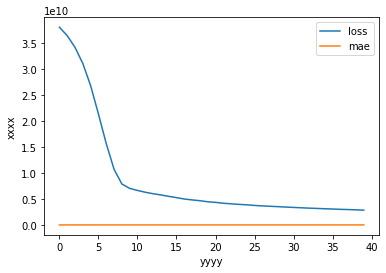

In [147]:
pd.DataFrame(history.history).plot()
plt.ylabel('xxxx')
plt.xlabel('yyyy')
print(history.history)

In [148]:
scores = model.evaluate(X_val, y_val, verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 2690105600.0000 - mae: 36639.2930


In [149]:
preds = model.predict(test_edited)
preds

46/46 [==============================] - 0s 1ms/step


array([[160880.03],
       [155103.94],
       [193773.94],
       ...,
       [203591.62],
       [149619.7 ],
       [214688.28]], dtype=float32)

In [150]:
output = pd.DataFrame(
{
    'Id':test_data['Id'],
    'SalePrice': np.squeeze(preds)
})
output

,Id,SalePrice
0,1461,160880.031250
1,1462,155103.937500
2,1463,193773.937500
3,1464,191690.015625
4,1465,178572.500000
...,...,...
1454,2915,134512.312500
1455,2916,141555.281250
1456,2917,203591.625000
1457,2918,149619.703125
